<h1>Ozempic Side Effects NLP<h1/>

<h2>Libraries<h2/>

In [1]:
import numpy as np
import pandas as pd
import praw
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation


<h2>Data Loading: Load Reddit data collected with PRAW.<h2/>

In [2]:
# PRAW Setup
reddit = praw.Reddit(
    client_id='FsHBk7J5OcNXIh2OmzXWOg',
    client_secret='oFwrVTKJgbRcjslvDCp0iM6d9RO7Xw',
    user_agent='MB WebScrapping by u/ActualConfusion3366'
)

count = 0
comments = []
for post in reddit.subreddit('all').search("ozempic", sort="new", limit=None):
    post.comments.replace_more(limit=0)
    """print(f"Title: {post.title}")
    print(f"Score: {post.score}")
    print(f"URL: {post.url}")
    print("-" * 50)"""
    count += 1
    for comment in post.comments[:5]:
        comments.append(comment.body)


df = pd.DataFrame(comments, columns=["comment"])   
print(df.head())
print(count)


                                             comment
0  Take it out of the fridge, put the needle on, ...
1  Straight away out of the fridge. Then back int...
2  I am leaving mine in the fridge for now. It’s ...
3  Yeah the ozempic is fine to inject cold. Ive t...
4  I would wait. Because you don’t know how your ...
239


<h2>Text Preprocessing<h2/>
    <ul>Preprocess the text data by lowercasing, removing punctuation, and filtering out stopwords.

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 1: Text Preprocessing
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df = df[~df['comment'].isin(["[deleted]", "[removed]"])]
df['cleaned_post'] = df['comment'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mab23\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment,cleaned_post
0,"Take it out of the fridge, put the needle on, ...",take fridge put needle prime inject ive found ...
1,Straight away out of the fridge. Then back int...,straight away fridge back fridge know don’t ke...
2,I am leaving mine in the fridge for now. It’s ...,leaving mine fridge it’s summer don’t ac i’m r...
3,Yeah the ozempic is fine to inject cold. Ive t...,yeah ozempic fine inject cold ive tried ways d...
4,I would wait. Because you don’t know how your ...,would wait don’t know body react could fine na...
...,...,...
608,Someone recently posted an excellent insight: ...,someone recently posted excellent insight tdee...
609,Hi! I injected my third shot last Sunday.\n\nI...,hi injected third shot last sunday need 2100 k...
610,Hi there! It looks like you’re asking a questi...,hi looks like you’re asking question subreddit...
611,There are days of the week where hitting my ca...,days week hitting calorie goals realistic days...


<h2>hello<h2/>

In [4]:
# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_post'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15129 stored elements and shape (609, 4532)>

<h2>hello<h2/>

In [5]:
# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df

,comment,cleaned_post,cluster
0,"Take it out of the fridge, put the needle on, ...",take fridge put needle prime inject ive found ...,0
1,Straight away out of the fridge. Then back int...,straight away fridge back fridge know don’t ke...,1
2,I am leaving mine in the fridge for now. It’s ...,leaving mine fridge it’s summer don’t ac i’m r...,0
3,Yeah the ozempic is fine to inject cold. Ive t...,yeah ozempic fine inject cold ive tried ways d...,1
4,I would wait. Because you don’t know how your ...,would wait don’t know body react could fine na...,0
...,...,...,...
608,Someone recently posted an excellent insight: ...,someone recently posted excellent insight tdee...,0
609,Hi! I injected my third shot last Sunday.\n\nI...,hi injected third shot last sunday need 2100 k...,1
610,Hi there! It looks like you’re asking a questi...,hi looks like you’re asking question subreddit...,0
611,There are days of the week where hitting my ca...,days week hitting calorie goals realistic days...,1


## Sentiment
1. Sample for manual sentiment
2. Train using manual sentiment
3. Predict using features

In [16]:
# Sample 50 rows from each cluster
sample_df = df.groupby('cluster').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)

# Export your sample DataFrame to a CSV file
sample_df.to_csv('ozempic_sample_for_labeling.csv', index=True)

"""# Add a new column for manual labels (after annotating them yourself)
sample_df['manual_sentiment'] = [0, 1, 0, ...]  # however you labeled them

# Map back to original df by index
df.loc[sample_df.index, 'manual_sentiment'] = sample_df['manual_sentiment']"""

C:\Users\mab23\AppData\Local\Temp\ipykernel_20420\2025338417.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('cluster').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)


"# Add a new column for manual labels (after annotating them yourself)\nsample_df['manual_sentiment'] = [0, 1, 0, ...]  # however you labeled them\n\n# Map back to original df by index\ndf.loc[sample_df.index, 'manual_sentiment'] = sample_df['manual_sentiment']"

In [ ]:
# Step 4: Sentiment Classification (Optional)

df['sentiment'] = df['cluster']  # 1: Positive, 0: Negative

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, df['sentiment'])

# Predict sentiment
df['predicted_sentiment'] = clf.predict(X)

# Classification report
report = classification_report(df['sentiment'], df['predicted_sentiment'], target_names=['Negative', 'Positive'])
print(report)
df

                                              comment  \
0   Also like 5  years down in your face looks :) ...   
1   Addiction to food is difficult.  With alcohol ...   
2   Hello there!   \nThanks for the interesting qu...   
3   Thank you so much for sharing your experience!...   
4                             I’ve lost 144lbs so yes   
..                                                ...   
95  I was on 2 and only lost 2lbs. from February t...   
96  How long does the 10mg last? I'm on 1mg Ozempi...   
97  My husband has been on it for just about a mon...   
98  If this is a worry, then don't use peptides. B...   
99  In 7 weeks you’ve lost 6lbs. How much weight d...   

                                         cleaned_post  cluster  sentiment  \
0   also like 5 years face looks congrats keep pus...        0          0   
1   addiction food difficult alcohol matter puttin...        0          0   
2   hello thanks interesting question hrv quite se...        0          0   
3   tha

C:\Users\mab23\AppData\Local\Temp\ipykernel_20420\3604149641.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('cluster').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)


,comment,cleaned_post,cluster,sentiment,predicted_sentiment,dominant_topic
0,"Take it out of the fridge, put the needle on, ...",take fridge put needle prime inject ive found ...,0,0,0,2
1,Straight away out of the fridge. Then back int...,straight away fridge back fridge know don’t ke...,1,1,0,2
2,I am leaving mine in the fridge for now. It’s ...,leaving mine fridge it’s summer don’t ac i’m r...,0,0,0,2
3,Yeah the ozempic is fine to inject cold. Ive t...,yeah ozempic fine inject cold ive tried ways d...,1,1,1,2
4,I would wait. Because you don’t know how your ...,would wait don’t know body react could fine na...,0,0,0,2
...,...,...,...,...,...,...
608,Someone recently posted an excellent insight: ...,someone recently posted excellent insight tdee...,0,0,0,0
609,Hi! I injected my third shot last Sunday.\n\nI...,hi injected third shot last sunday need 2100 k...,1,1,1,0
610,Hi there! It looks like you’re asking a questi...,hi looks like you’re asking question subreddit...,0,0,0,4
611,There are days of the week where hitting my ca...,days week hitting calorie goals realistic days...,1,1,1,0


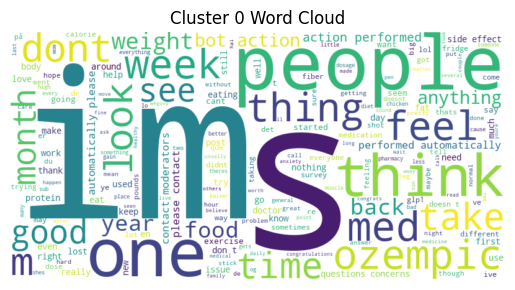

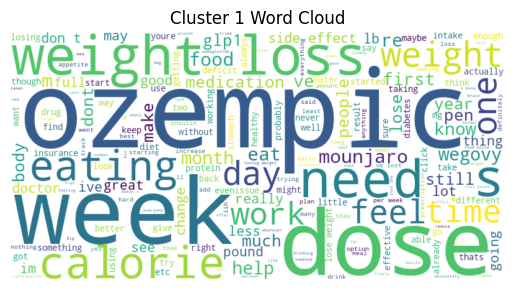

In [7]:

# Create a word cloud for each cluster
for cluster in df['cluster'].unique():
    cluster_text = ' '.join(df[df['cluster'] == cluster]['cleaned_post'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Vectorize your text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['cleaned_post'])

# Step 2: Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [9]:
def print_lda_topics(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Call this with your fitted LDA model and your CountVectorizer
print_lda_topics(lda_model, vectorizer)


Topic 1: weight, ozempic, loss, like, calories, need, dose, people, im, eating
Topic 2: weight, like, look, wow, kaiser, congrats, im, try, lost, dose
Topic 3: like, think, time, week, day, dose, ozempic, thing, dont, don
Topic 4: good, det, feel, med, på, du, people, er, og, har
Topic 5: questions, concerns, automatically, information, bot, moderators, action, contact, advice, performed


In [10]:
lda_topic_matrix = lda_model.transform(doc_term_matrix)
df['dominant_topic'] = np.argmax(lda_topic_matrix, axis=1)

sentiment_by_topic = df.groupby(['dominant_topic', 'sentiment']).size().unstack(fill_value=0)
# Add total column
sentiment_by_topic['total_comments'] = sentiment_by_topic.sum(axis=1)
print(sentiment_by_topic)

sentiment         0    1  total_comments
dominant_topic                          
0               131  149             280
1                71   13              84
2                89   29             118
3                59    4              63
4                59    5              64
